# **Problem Statement:**
---
#### Check association among employee experience, skills, traits to better manage human resources in the organization.


In [ ]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go

# **Employee_skills_traits Data:**


In [ ]:
emp_df = pd.read_csv("./Employee_skills_traits.csv")
pd.set_option('display.max_columns', None)

## **Employee_Dataframe Size:**

In [ ]:
emp_df.shape

(998, 14)

## **Top 10 Records:**

In [ ]:
emp_df.head(10)

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
5,8142,10,9,0,0,45,1,0,0,0,0,0,1,0
6,7655,16,4,1,1,36,1,1,1,0,1,0,1,0
7,5244,7,4,1,1,32,1,0,0,1,0,0,0,1
8,15940,16,5,0,0,36,0,0,1,0,0,1,0,0
9,3203,19,3,1,1,39,1,1,0,1,0,0,1,0


## **Bottom 10 Records:**

In [ ]:
emp_df.tail(10)

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
988,1229,7,7,1,0,52,0,1,0,1,1,1,1,1
989,1185,5,5,1,1,32,1,1,0,1,1,0,0,1
990,12821,7,7,1,0,32,0,1,0,1,0,0,1,1
991,13456,15,6,1,1,50,1,1,1,0,1,0,0,0
992,19773,7,3,0,1,28,0,1,1,1,0,1,1,1
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1
997,17170,16,6,1,1,44,0,1,0,1,1,1,0,0


## **Dropping extra columns:**

In [ ]:
emp_df.drop(columns=["ID"], inplace=True)

In [ ]:
emp_df.shape

(998, 13)

## **Removing extra spaces from column names:**

In [ ]:
# dataframe columns
print("Before stripping:\n", emp_df.columns)

emp_df.columns = emp_df.columns.str.strip()

print("After stripping:\n", emp_df.columns)

Before stripping:
 Index(['Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')
After stripping:
 Index(['Employment period', 'Time in current department', 'Gender',
       'Team leader', 'Age', 'Member of professional organizations', '.Net',
       'SQL Server', 'HTML CSS Java Script', 'PHP mySQL', 'Fast working',
       'Awards', 'Communicative'],
      dtype='object')


## **Checking dataframe for null, NaN values:**

In [ ]:
emp_df.isnull().sum()

Employment period                       0
Time in current department              0
Gender                                  0
Team leader                             0
Age                                     0
Member of professional organizations    0
.Net                                    0
SQL Server                              0
HTML CSS Java Script                    0
PHP mySQL                               0
Fast working                            0
Awards                                  0
Communicative                           0
dtype: int64

**Conclusion: Employee_Dataframe does not have NaN, null values.**
<br><br>
## **Checking Employee_Dataframe for duplicate records:**

In [ ]:
# duplicate records
emp_df.duplicated().value_counts()

False    998
dtype: int64

**Conclusion: Employee_Dataframe does not have duplicate records.**
<br><br>

## **Employee_Dataframe Info:**

In [ ]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Employment period                     998 non-null    int64
 1   Time in current department            998 non-null    int64
 2   Gender                                998 non-null    int64
 3   Team leader                           998 non-null    int64
 4   Age                                   998 non-null    int64
 5   Member of professional organizations  998 non-null    int64
 6   .Net                                  998 non-null    int64
 7   SQL Server                            998 non-null    int64
 8   HTML CSS Java Script                  998 non-null    int64
 9   PHP mySQL                             998 non-null    int64
 10  Fast working                          998 non-null    int64
 11  Awards                                998 non

## **Describe Employee_Dataframe:**

In [ ]:
emp_df.describe()

,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,10.388778,5.660321,0.484970,0.504008,40.441884,0.48998,0.476954,0.475952,0.508016,0.477956,0.503006,0.502004,0.521042
std,5.787715,3.196953,0.500025,0.500235,8.059964,0.50015,0.499719,0.499672,0.500186,0.499764,0.500242,0.500247,0.499808
min,1.000000,1.000000,0.000000,0.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000,0.000000,34.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,5.000000,0.000000,1.000000,40.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,15.000000,8.000000,1.000000,1.000000,47.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20.000000,12.000000,1.000000,1.000000,55.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Boxplots of Employee skills_traits:**

In [ ]:
data0 = [go.Bar(x=emp_df[emp_df.columns[0]],
                y=emp_df[col],
                name=col) for col in emp_df.columns[1:]]

fig0 = go.Figure()
for item in emp_df.columns[1:]:
    fig0.add_trace(go.Box(y=emp_df[item], name=item))
fig0.show()

Conclusion: Employee dataframe have no outliers.

## **Gender Unique Value_counts:**

In [ ]:
emp_df["Gender"].value_counts()

0    514
1    484
Name: Gender, dtype: int64

## **Dividing Age column into bins**
1/ 24-30 -> Young<br>
2/ 30-45 -> Middle<br>
3/ >45 -> Old

In [ ]:
def bins(item):
    if item<=30:
        return 'young'
    elif item<=45:
        return 'middle'
    else:
        return 'old'

In [ ]:
emp_df['age_bin'] = emp_df.Age.apply(lambda item: bins(item))

In [ ]:
emp_df["age_bin"].value_counts()

middle    577
old       302
young     119
Name: age_bin, dtype: int64

Conclusion: There are lot of middle aged people

In [ ]:
df_grp = emp_df.groupby('age_bin').agg({'.Net':'sum', 'SQL Server':'sum', 'HTML CSS Java Script':'sum', 'PHP mySQL':'sum',
                                        'Fast working':'sum', 'Awards':'sum', 'Communicative':'sum'}).reset_index()

In [ ]:
df_grp

,age_bin,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,middle,277,265,299,269,302,281,287
1,old,142,149,145,150,150,159,162
2,young,57,61,63,58,50,61,71


In [ ]:
data = [go.Scatter(x=df_grp[df_grp.columns[0]],
                   y=df_grp[col],
                   name=col) for col in df_grp.columns[1:]]

layout = go.Layout(title='Skills based on Age',
                   xaxis={'title': 'Age', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   yaxis={'title': 'Total Skills', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   hovermode="closest")
fig = go.Figure(data=data, layout=layout)
fig.show()

Conclusion: The middle aged people are highly skilled than the old ages and younger ones. As the younger ones are mostly freshers they are skilled less.

In [ ]:
df_gender_grp = emp_df.groupby('Gender').agg({'.Net':'sum', 'SQL Server':'sum', 'HTML CSS Java Script':'sum', 'PHP mySQL':'sum',
                                        'Fast working':'sum', 'Awards':'sum', 'Communicative':'sum'}).reset_index()

In [ ]:
df_gender_grp

,Gender,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,0,252,256,261,230,272,252,274
1,1,224,219,246,247,230,249,246


In [ ]:
data1 = [go.Scatter(x=df_gender_grp[df_gender_grp.columns[0]],
                   y=df_gender_grp[col],
                   name=col) for col in df_gender_grp.columns[1:]]

layout1 = go.Layout(title='Skills based on Gender',
                   xaxis={'title': 'Gender', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   yaxis={'title': 'Total Skills', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   hovermode="closest")
fig1 = go.Figure(data=data1, layout=layout1)
fig1.show()

We can see that Gender 0 is highly skilled compared to Gender 1 in all skills except PHP mySQL in which Gender 1 a bit more skilled. Both the genders got almost equal number of awards.

In [ ]:
df_employment_grp = emp_df.groupby('Employment period').agg({'.Net':'sum', 'SQL Server':'sum', 'HTML CSS Java Script':'sum', 'PHP mySQL':'sum',
                                                'Fast working':'sum', 'Awards':'sum', 'Communicative':'sum'}).reset_index()

In [ ]:
df_employment_grp.head()

,Employment period,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,1,29,27,20,29,18,22,22
1,2,25,25,28,24,30,31,31
2,3,29,27,23,25,19,25,36
3,4,26,25,24,20,26,23,26
4,5,24,29,26,27,27,30,35


In [ ]:
data2 = [go.Scatter(x=df_employment_grp[df_employment_grp.columns[0]],
                   y=df_employment_grp[col],
                   name=col) for col in df_employment_grp.columns[1:]]

layout2 = go.Layout(title='Skills based on Employment Period',
                   xaxis={'title': 'Employment Period', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   yaxis={'title': 'Total Skills', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   hovermode="closest")
fig2 = go.Figure(data=data2, layout=layout2)
fig2.show()

We can observe that People with Employement period 18 has low skills compared to others

## **Added 'Combined_skills' column in the Dataframe:**

In [ ]:
emp_df['Combined skills'] = emp_df['.Net'] + emp_df['SQL Server'] + emp_df['HTML CSS Java Script'] + emp_df['PHP mySQL'] + emp_df['Fast working'] + emp_df['Communicative']

In [ ]:
emp_df.head()

,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,age_bin,Combined skills
0,5,4,0,1,48,1,1,1,0,1,1,0,1,old,5
1,5,3,1,1,26,1,1,0,0,1,1,0,0,young,3
2,11,8,0,0,34,0,0,1,1,0,1,0,1,middle,4
3,7,5,1,1,27,1,0,1,0,1,1,1,0,young,3
4,18,8,0,0,38,0,0,0,1,1,1,1,1,middle,4


In [ ]:
df_count = emp_df.groupby('Combined skills')['Employment period'].count().reset_index()

In [ ]:
df_count.head()

,Combined skills,Employment period
0,0,17
1,1,94
2,2,250
3,3,297
4,4,239


In [ ]:
data3 = go.Bar(x=df_count[df_count.columns[0]], y=df_count[df_count.columns[1]])

layout3 = go.Layout(title='Total number of skills owned by Employees',
                   xaxis={'title': 'Total number of Skills', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   yaxis={'title': 'Count', 'titlefont': {'size': 18, 'color': '#7f7f7f'}},
                   hovermode="closest")
fig3 = go.Figure(data=data3, layout=layout3)
fig3.show()

There are a lot of employees with 3 skills

## **HeatMap of Young employee's skills_traits:**

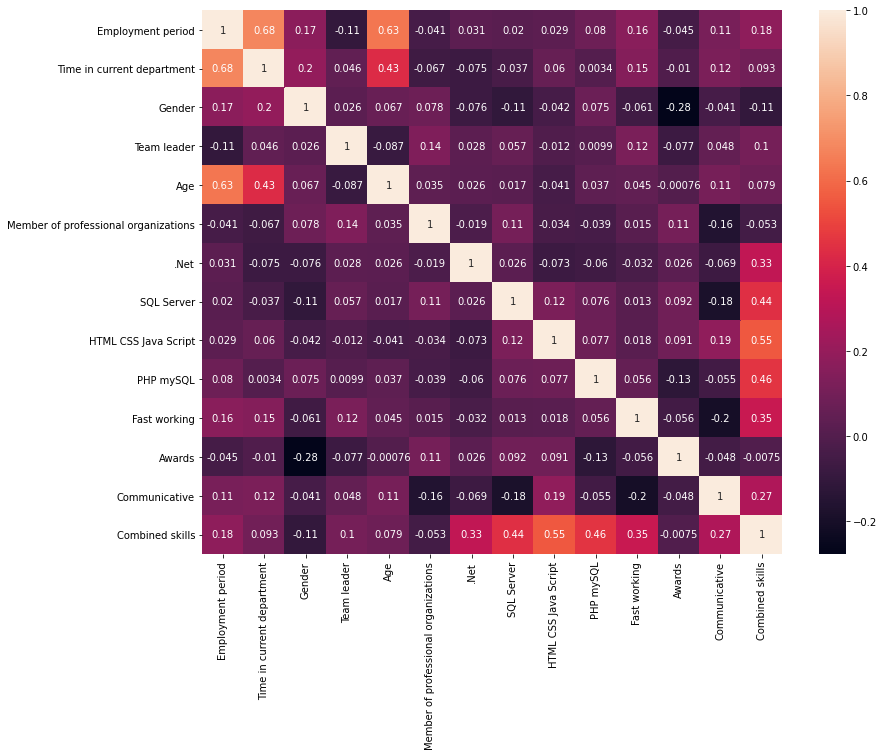

In [ ]:
# To visualise these correlations, we can use Seaborn’s heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(data=emp_df[emp_df.age_bin=='young'].corr(), annot=True)

## **HeatMap of middle-aged employee's skills_traits:**

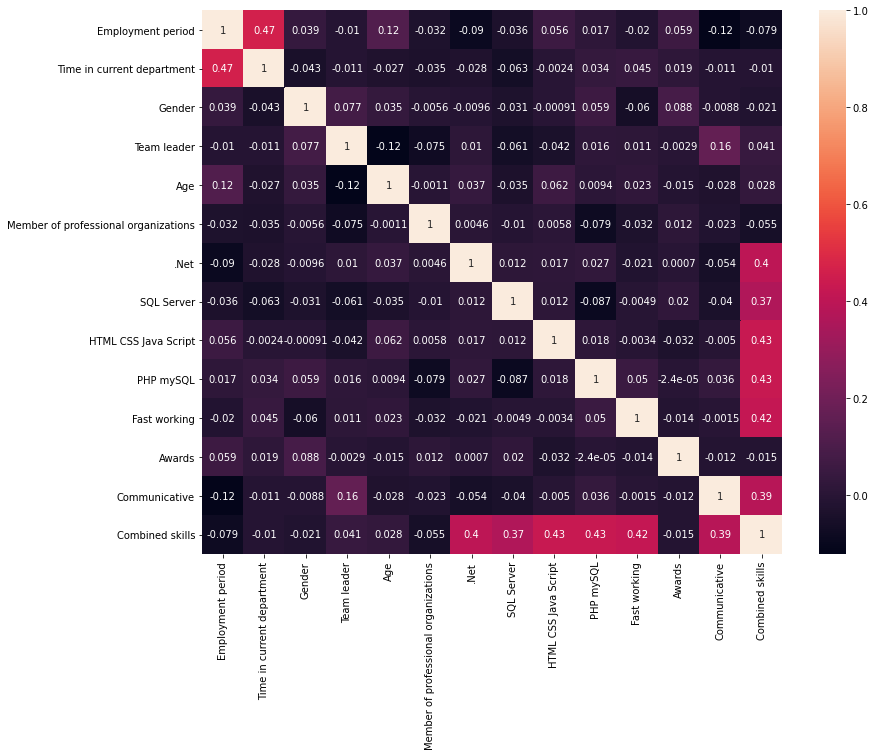

In [ ]:
# To visualise these correlations, we can use Seaborn’s heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(data=emp_df[emp_df.age_bin=='middle'].corr(), annot=True)

## **HeatMap of old-aged employee's skills_traits:**

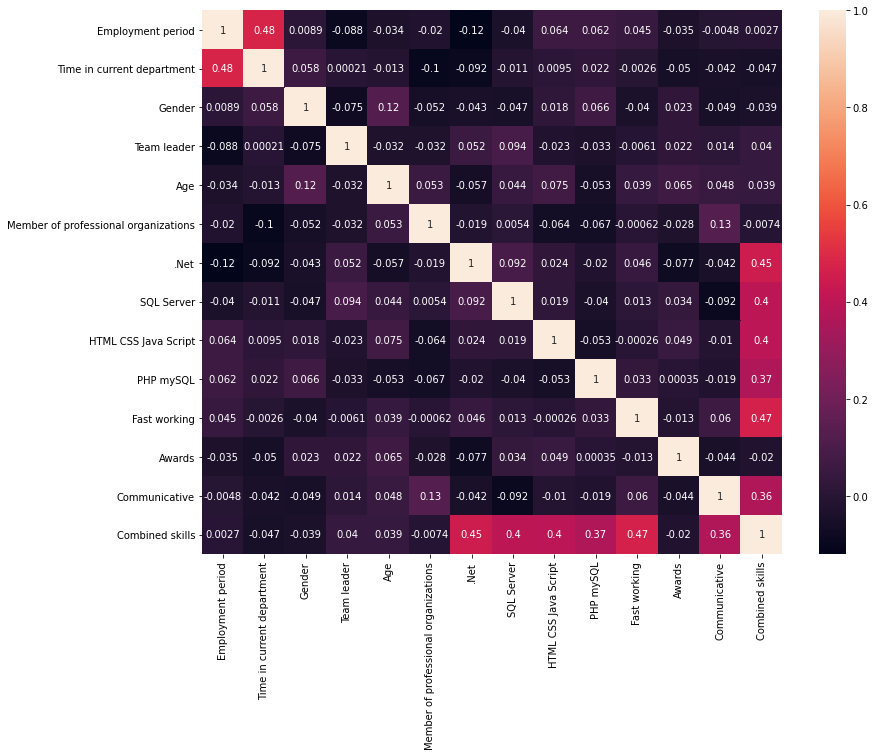

In [ ]:
# To visualise these correlations, we can use Seaborn’s heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(data=emp_df[emp_df.age_bin=='old'].corr(), annot=True)

# **Finding Association Rules in Employee skills/traits:**

In [ ]:
skills_traits = emp_df[['Team leader', 'Member of professional organizations', '.Net',
       'SQL Server', 'HTML CSS Java Script', 'PHP mySQL', 'Fast working',
       'Awards', 'Communicative']]
skills_traits.head()

,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,1,1,1,1,0,1,1,0,1
1,1,1,1,0,0,1,1,0,0
2,0,0,0,1,1,0,1,0,1
3,1,1,0,1,0,1,1,1,0
4,0,0,0,0,1,1,1,1,1


## **Apriori Algorithm:**

In [ ]:
frequent_skills = apriori(skills_traits, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_skills, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(.Net),(Team leader),0.476954,0.504008,0.246493,0.516807,1.025394,0.006104,1.026488
1,(Team leader),(.Net),0.504008,0.476954,0.246493,0.489066,1.025394,0.006104,1.023705
2,(SQL Server),(Team leader),0.475952,0.504008,0.240481,0.505263,1.002490,0.000597,1.002537
3,(Team leader),(SQL Server),0.504008,0.475952,0.240481,0.477137,1.002490,0.000597,1.002267
4,(PHP mySQL),(Team leader),0.477956,0.504008,0.241483,0.505241,1.002447,0.000589,1.002492


### **Total Association Rules:**

In [ ]:
rules.shape

(1314, 9)

### **Filtering Association Rules:**

In [ ]:
filtered_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(.Net),(Team leader),0.476954,0.504008,0.246493,0.516807,1.025394,0.006104,1.026488
2,(SQL Server),(Team leader),0.475952,0.504008,0.240481,0.505263,1.002490,0.000597,1.002537
4,(PHP mySQL),(Team leader),0.477956,0.504008,0.241483,0.505241,1.002447,0.000589,1.002492
6,(Team leader),(Fast working),0.504008,0.503006,0.257515,0.510934,1.015762,0.003996,1.016211
7,(Fast working),(Team leader),0.503006,0.504008,0.257515,0.511952,1.015762,0.003996,1.016277


In [ ]:
filtered_rules.shape

(370, 9)

In [ ]:
employee_traits = []

In [ ]:
def skills_rules():
  for id, row in filtered_rules.iterrows():
    [employee_traits.append(i.lower().strip()) for i in row.antecedents if i not in employee_traits]
    [employee_traits.append(i.lower().strip()) for i in row.consequents if i not in employee_traits]
    print("Rule: ", set(row.antecedents), "->", set(row.consequents))
    print("Support: ", row.support)
    print("Confidence: ", row.confidence)
    print("Lift: ", row.lift)
    print("=====================================")

skills_rules()

Rule:  {'.Net'} -> {'Team leader'}
Support:  0.24649298597194388
Confidence:  0.5168067226890757
Lift:  1.0253938553552635
Rule:  {'SQL Server'} -> {'Team leader'}
Support:  0.24048096192384769
Confidence:  0.5052631578947369
Lift:  1.0024903212305116
Rule:  {'PHP mySQL'} -> {'Team leader'}
Support:  0.24148296593186372
Confidence:  0.5052410901467506
Lift:  1.0024465367126383
Rule:  {'Team leader'} -> {'Fast working'}
Support:  0.2575150300601202
Confidence:  0.510934393638171
Lift:  1.0157620016950093
Rule:  {'Fast working'} -> {'Team leader'}
Support:  0.2575150300601202
Confidence:  0.5119521912350598
Lift:  1.0157620016950093
Rule:  {'Communicative'} -> {'Team leader'}
Support:  0.2895791583166333
Confidence:  0.5557692307692308
Lift:  1.1026991894785136
Rule:  {'Team leader'} -> {'Communicative'}
Support:  0.2895791583166333
Confidence:  0.5745526838966203
Lift:  1.1026991894785136
Rule:  {'Member of professional organizations'} -> {'Awards'}
Support:  0.24849699398797595
Confide

# **WordCloud of Employee's Traits:**

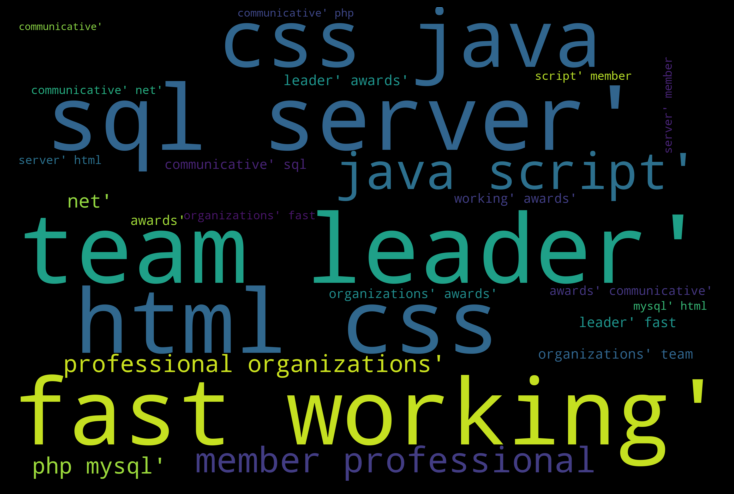

In [ ]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(employee_traits))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)